In [11]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import tkinter as tk
from tkinter import filedialog, messagebox
import pickle
import pandas as pd 

Load the pickle file to access the dictionary 

In [4]:
def load_pickle_file(file_name):
    # ask the user to select the directory path to the pickle file
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askdirectory()

    # load the selected pickle file from the user provided file path
    if file_path:
        try:
            with open(file_path + '/' + file_name, 'rb') as f:
                output_dict_forprocessing = pickle.load(f)
                print("Pickle file loaded successfully.")
        except FileNotFoundError:
            print("No pickle file found in the selected directory.")
            
    return output_dict_forprocessing

#load the pickle file
output_dict_forprocessing = load_pickle_file('SpikeTrains_for_PSTHs.p')          

Pickle file loaded successfully.


Expand the input dictionary to account for stimulus trials (zero, low, mid, high) 

In [5]:
def convert_inputdict_2_trialdict(my_dict):
    
    #initialize an empty dictionary
    trial_dict = {}
    
    #iterate over the keys in the dictionary to access the matrix values
    for key in my_dict.keys():
        
        #store matrix per key in the input dictionary in a new dictionary, but first change the key name by adding '_zero' to the end of the key name to label the stimulus intensity
        trial_dict[str(key) + '_zero'] = my_dict[key][0,0] #store the 2D matrix, assumes that index 0 is the zero intensity stimulus
        trial_dict[str(key) + '_low'] = my_dict[key][0,1] #store the 2D matrix, assumes that index 1 is the low intensity stimulus
        trial_dict[str(key) + '_mid'] = my_dict[key][0,2] #store the 2D matrix, assumes that index 2 is the mid intensity stimulus
        trial_dict[str(key) + '_high'] = my_dict[key][0,3] #store the 2D matrix, assumes that index 3 is the high intensity stimulus
        
        #print the key name and the shape of the matrix to make sure it is correct
        print("The key name is: " + str(key) + "_zero" + " and the shape of the matrix is: " + str(my_dict[key][0,0].shape))
        print("The key name is: " + str(key) + "_low" + " and the shape of the matrix is: " + str(my_dict[key][0,1].shape))
        print("The key name is: " + str(key) + "_mid" + " and the shape of the matrix is: " + str(my_dict[key][0,2].shape))
        print("The key name is: " + str(key) + "_high" + " and the shape of the matrix is: " + str(my_dict[key][0,3].shape))    
        
    #the new dictionary should have the four times the number of keys as the input dictionary
    #if not, then return an error message
    assert len(trial_dict) == 4*len(my_dict), "The new dictionary does not have four times the number of keys as the input dictionary."

    #if it is, then return the new dictionary
    return trial_dict      

#call the convert_inputdict_2_trialdict function  
trial_dict_forprocessing = convert_inputdict_2_trialdict(output_dict_forprocessing) #this is the dictionary that will be used for further processing and will have the 2D matrices as values for each key

The key name is: Lmc_opsin_lmc_ch_2_3093_rec1_cid93_post_SpikeTrains_for_PSTHs_zero and the shape of the matrix is: (114, 1500)
The key name is: Lmc_opsin_lmc_ch_2_3093_rec1_cid93_post_SpikeTrains_for_PSTHs_low and the shape of the matrix is: (126, 1500)
The key name is: Lmc_opsin_lmc_ch_2_3093_rec1_cid93_post_SpikeTrains_for_PSTHs_mid and the shape of the matrix is: (120, 1500)
The key name is: Lmc_opsin_lmc_ch_2_3093_rec1_cid93_post_SpikeTrains_for_PSTHs_high and the shape of the matrix is: (131, 1500)
The key name is: Lmc_opsin_lmc_ch_1_3094_rec1_cid134_post_SpikeTrains_for_PSTHs_zero and the shape of the matrix is: (108, 1500)
The key name is: Lmc_opsin_lmc_ch_1_3094_rec1_cid134_post_SpikeTrains_for_PSTHs_low and the shape of the matrix is: (118, 1500)
The key name is: Lmc_opsin_lmc_ch_1_3094_rec1_cid134_post_SpikeTrains_for_PSTHs_mid and the shape of the matrix is: (134, 1500)
The key name is: Lmc_opsin_lmc_ch_1_3094_rec1_cid134_post_SpikeTrains_for_PSTHs_high and the shape of the

Create the incomplate dataframe from the dictionary for processing

In [6]:
#make a function that will loop through thr dictionary keys and create a dataframe per key
def create_dataframe_from_dict(my_dict):
    
    #initialize an empty dictionary
    main_df = pd.DataFrame()
    
    #iterate over the keys and store the key name as the column name in the dataframe under 'trial_name' column
    #and store the values of the key under 'spikes'ArithmeticError
    
    for key in my_dict.keys():
        temp_df = pd.DataFrame()
        temp_df['trial_name'] = [str(key)]
        
        temp_df['spikes'] = [my_dict[key]]
        
        #print the shape of the values to make sure it is correct
        print("The key name is: " + str(key) + " and the shape of the matrix is: " + str(my_dict[key].shape))
        
        #use concat to append the temporary dataframe to the main dataframe
        main_df = pd.concat([main_df, temp_df], ignore_index=True)
        
    return main_df

#call the function to create the dataframe
main_df_forprocessing = create_dataframe_from_dict(trial_dict_forprocessing) 

#check the dataframe to access the first entry in spikes column
first_entry_df = main_df_forprocessing['spikes'][0]

#what is the key name for the first entry?
first_entry_key = main_df_forprocessing['trial_name'][0]      


The key name is: Lmc_opsin_lmc_ch_2_3093_rec1_cid93_post_SpikeTrains_for_PSTHs_zero and the shape of the matrix is: (114, 1500)
The key name is: Lmc_opsin_lmc_ch_2_3093_rec1_cid93_post_SpikeTrains_for_PSTHs_low and the shape of the matrix is: (126, 1500)
The key name is: Lmc_opsin_lmc_ch_2_3093_rec1_cid93_post_SpikeTrains_for_PSTHs_mid and the shape of the matrix is: (120, 1500)
The key name is: Lmc_opsin_lmc_ch_2_3093_rec1_cid93_post_SpikeTrains_for_PSTHs_high and the shape of the matrix is: (131, 1500)
The key name is: Lmc_opsin_lmc_ch_1_3094_rec1_cid134_post_SpikeTrains_for_PSTHs_zero and the shape of the matrix is: (108, 1500)
The key name is: Lmc_opsin_lmc_ch_1_3094_rec1_cid134_post_SpikeTrains_for_PSTHs_low and the shape of the matrix is: (118, 1500)
The key name is: Lmc_opsin_lmc_ch_1_3094_rec1_cid134_post_SpikeTrains_for_PSTHs_mid and the shape of the matrix is: (134, 1500)
The key name is: Lmc_opsin_lmc_ch_1_3094_rec1_cid134_post_SpikeTrains_for_PSTHs_high and the shape of the

Create the complete dataframe for processing as this will add columns where stimulus condition, group name, cell id, mouse id, and is post epoch is a boolean 

In [7]:
#make a function that will now add columnns based on the trial name columns 
def add_columns_from_trial_name(my_df):
    
    #create a new column called is_post, if the the trial_name contains_post then the value is True, if not then the value is False
        my_df['is_post'] = my_df['trial_name'].str.contains('post')
    
    #create four columns called zero, low, mid, high and store as True if the trial_name contains zero, low, mid, high respectively and False if not
        my_df['zero'] = my_df['trial_name'].str.contains('zero')
        my_df['low'] = my_df['trial_name'].str.contains('low')
        my_df['mid'] = my_df['trial_name'].str.contains('mid')
        my_df['high'] = my_df['trial_name'].str.contains('high')
    
    #create a column called 'group_name' and store the group name based on the trial_name, if 'Lmc_opsin' is in the trial_name then store 'Lmc_opsin' in the group_name column, if 'Lmc_noopsin' is in the trial_name then store 'Lmc_noopsin' in the group_name column
        my_df['group_name'] = np.where(my_df['trial_name'].str.contains('Lmc_opsin'), 'Lmc_opsin', 'Lmc_noopsin')
    
    #create a column that has the cell_id based on the trial_name, first by spliting the trial_name between the 7th and 8th '_' and then extracting the characters after the 7th but before the 8th '_' and storing in a new column called cell_id
        my_df['cell_id'] = my_df['trial_name'].str.split('_', expand = True)[7] 
    
    #create a column that has the mouse id based on the trial_name by finding four consecutive numbers in the trial_name and storing them in a new column called mouse_id
        my_df['mouse_id'] = my_df['trial_name'].str.extract('(\d{4})', expand = True)
    
    #save the dataframe as a pickle file in the same directory as the script 
    
    #return the dataframe
        return my_df

#call the function to add columns to the dataframe  
main_df_forprocessing_addedcol = add_columns_from_trial_name(main_df_forprocessing)

#access the first entry in the dataframe to make sure the columns were added correctly
first_entry_df_addedcol = main_df_forprocessing_addedcol['spikes'][0] #should be a 2D matrix 

#confirm that this is the case
print("The shape of the first entry in the dataframe is: " + str(first_entry_df_addedcol.shape))

The shape of the first entry in the dataframe is: (114, 1500)


In [8]:
#write a function that prompts the user with a window to select the directory path where the csv file will be saved 
def save_dataframe_as_csv(my_df):
    # ask the user to select the directory path to the pickle file
    root = tk.Tk()
    
    #hide the root window
    root.withdraw()
    
    #ask the user to select the directory path to save the csv file
    file_path = filedialog.askdirectory()
    
    #save the dataframe as a csv file in the user provided directory path
    if file_path:
        try:
            my_df.to_csv(file_path + '/' + 'spikes_dataframe.csv')
            print("Dataframe saved successfully.")
        except FileNotFoundError:
            print("No directory path selected.")
            
#call the function to save the dataframe as a csv file
save_dataframe_as_csv(main_df_forprocessing_addedcol)

Dataframe saved successfully.


In [8]:
#write a function that prompts the user with a window to select the directory where the pickle file will be saved
def save_dataframe_as_pickle(my_df):
        
        #prompt the user with a window to select the directory where the pickle file will be saved
        pickle_file = filedialog.asksaveasfilename(initialdir = "/Users/cresp1el/Documents/lmc_project_analysis_dir/analysis_directory", title = "Select directory to save pickle file", filetypes = (("pickle files","*.pickle"),("all files","*.*")))
        
        #save the dataframe as a pickle file 
        my_df.to_pickle(pickle_file)
        
        #check if the file has been saved as a pickle file in the directory
        assert os.path.exists(pickle_file), "The dataframe has not been saved as a pickle file in the directory." 
        
        #return the dataframe
        return my_df
    
#call the function to save the dataframe as a pickle file
main_df_forprocessing_addedcol_pickle = save_dataframe_as_pickle(main_df_forprocessing_addedcol)

In [ ]:
#using pandas version 1.3.3, save the dataframe as a pickle file 
main_df_forprocessing_addedcol_pickle.to_pickle('spikes_dataframe.pickle')

In [9]:
#load the pickle file as a dataframe, for further proressing
spikes_df = pd.read_pickle('/Users/cresp1el/Documents/lmc_project_analysis_dir/analysis_directory/test5.pickle')

#check the dataframe --not needed for the script

In [10]:
#check the first entry in the dataframe
first_entry_spikes_df = spikes_df['spikes'][0]

#how many cells are there in the dataframe per group?
spikes_df.groupby('group_name')['cell_id'].nunique()

#print the unique cell ids per group
print('The unique cell ids per group are: ', spikes_df.groupby('group_name')['cell_id'].unique())

#print the unique mice 
print('The unique mice per group are: ', spikes_df.groupby('group_name')['mouse_id'].unique())

#how many mice are there in the dataframe per group?
spikes_df.groupby('group_name')['mouse_id'].nunique()



The unique cell ids per group are:  group_name
Lmc_noopsin    [cid21, cid24, cid219, cid211, cid159, cid22, ...
Lmc_opsin      [cid93, cid134, cid113, cid52, cid238, cid148,...
Name: cell_id, dtype: object
The unique mice per group are:  group_name
Lmc_noopsin          [3096]
Lmc_opsin      [3093, 3094]
Name: mouse_id, dtype: object


group_name
Lmc_noopsin    1
Lmc_opsin      2
Name: mouse_id, dtype: int64

The shape of the zero matrix is:  (124, 1500)
The shape of the low matrix is:  (134, 1500)
The shape of the mid matrix is:  (111, 1500)
The shape of the high matrix is:  (138, 1500)


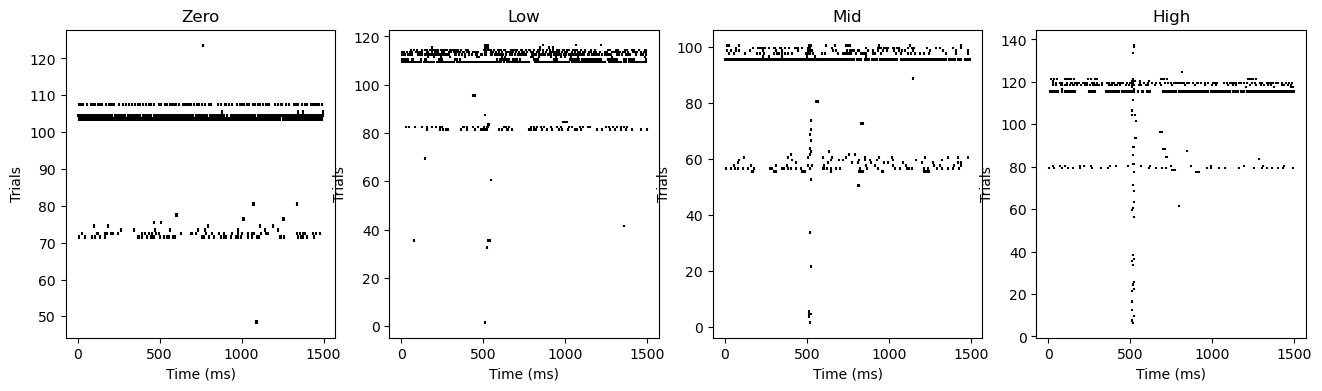

In [11]:
#make a function that will take in a user group name, a cell id, mouse id, and pre or post and return four numpy matrices
def create_matrices_from_user_input(group_name, cell_id, mouse_id, pre_or_post):

    #create a dataframe that has the user input group name, cell id, mouse id, and pre or post
    user_input_df = spikes_df[(spikes_df['group_name'] == group_name) & (spikes_df['cell_id'] == cell_id) & (spikes_df['mouse_id'] == mouse_id) & (spikes_df['is_post'] == pre_or_post)]
    
    #check if the dataframe is empty
    if user_input_df.empty:
        print('No data found for the given input.')
        return None
    
    #now create four numpy matrices from the dataframe based on the true values in the zero, low, mid, high columns
    zero_matrix = user_input_df[user_input_df['zero'] == True]['spikes'].iloc[0]
    low_matrix = user_input_df[user_input_df['low'] == True]['spikes'].iloc[0]
    mid_matrix = user_input_df[user_input_df['mid'] == True]['spikes'].iloc[0]
    high_matrix = user_input_df[user_input_df['high'] == True]['spikes'].iloc[0]
    
    #print the shape of each matrix
    print('The shape of the zero matrix is: ', zero_matrix.shape)
    print('The shape of the low matrix is: ', low_matrix.shape)
    print('The shape of the mid matrix is: ', mid_matrix.shape)
    print('The shape of the high matrix is: ', high_matrix.shape)
    
    #return the four matrices in a list
    return [zero_matrix, low_matrix, mid_matrix, high_matrix] #this is a list of numpy matrices 

#call the function to create the matrices   
user_input_matrices = create_matrices_from_user_input('Lmc_opsin', 'cid93', '3093', False)

#now plot the raster plots for each matrix in a subplot 
def plot_raster_plots_from_matrices(matrices_list):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    for i in range(len(matrices_list)):
        for ii in range(matrices_list[i].shape[0]):
            spike_times = np.where(matrices_list[i][ii] == 1)[0]
            axs[i].vlines(spike_times, ii, ii+1, color='black')
            axs[i].set_ylabel('Trials')
            axs[i].set_xlabel('Time (ms)')
            #make each matrix tittle the stimulus intensity 
            if i == 0:
                axs[i].set_title('Zero')
            elif i == 1:
                axs[i].set_title('Low')
            elif i == 2:
                axs[i].set_title('Mid')
            elif i == 3:
                axs[i].set_title('High')
                
                
    plt.show()
    return fig, axs
    
#call the function to plot the raster plots for each matrix
raster_plots = plot_raster_plots_from_matrices(user_input_matrices)    
                
        



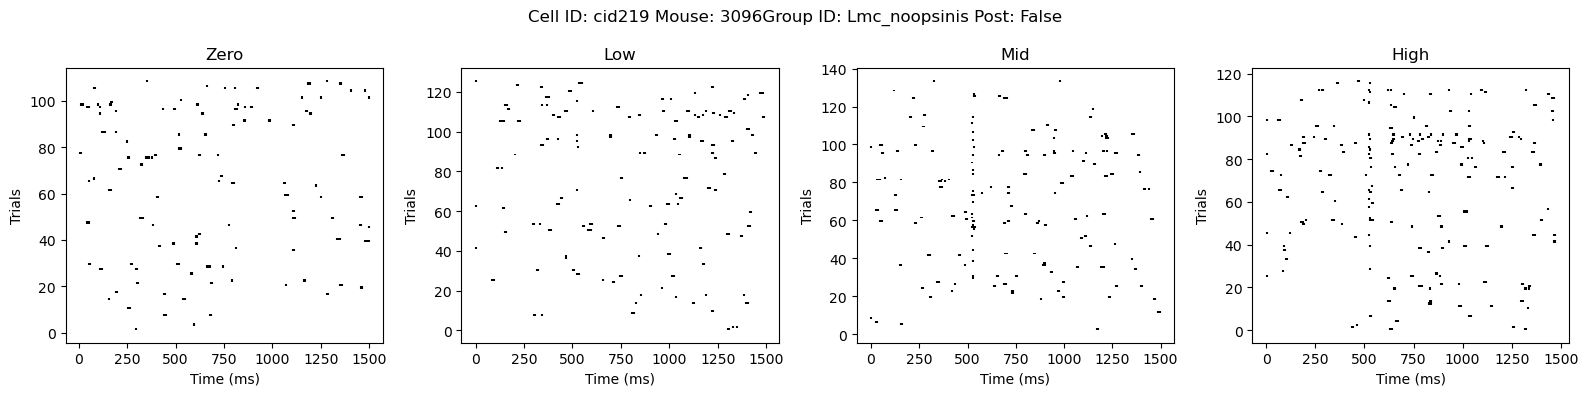

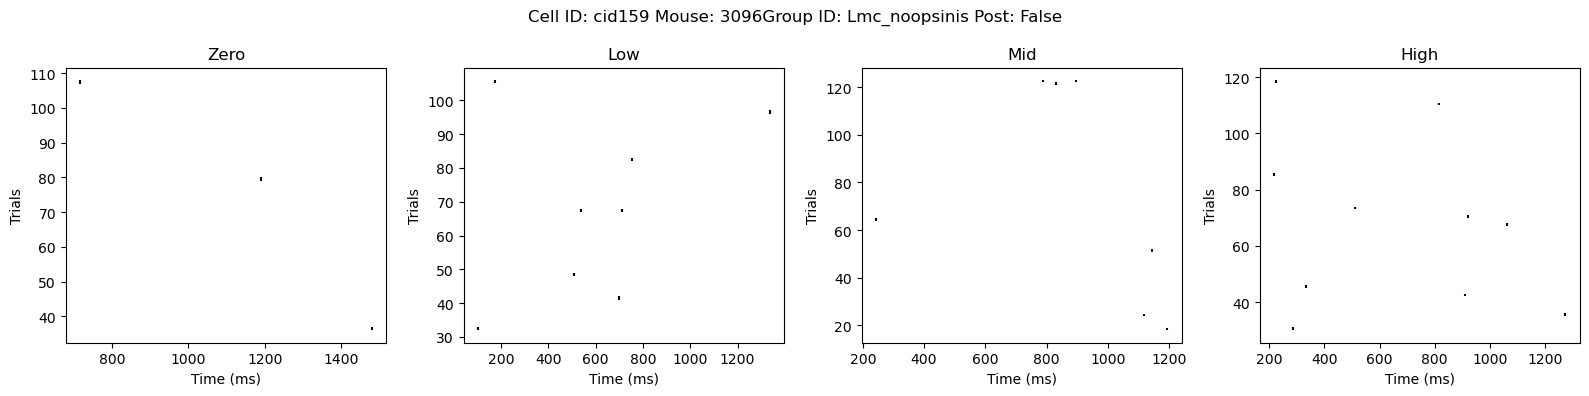

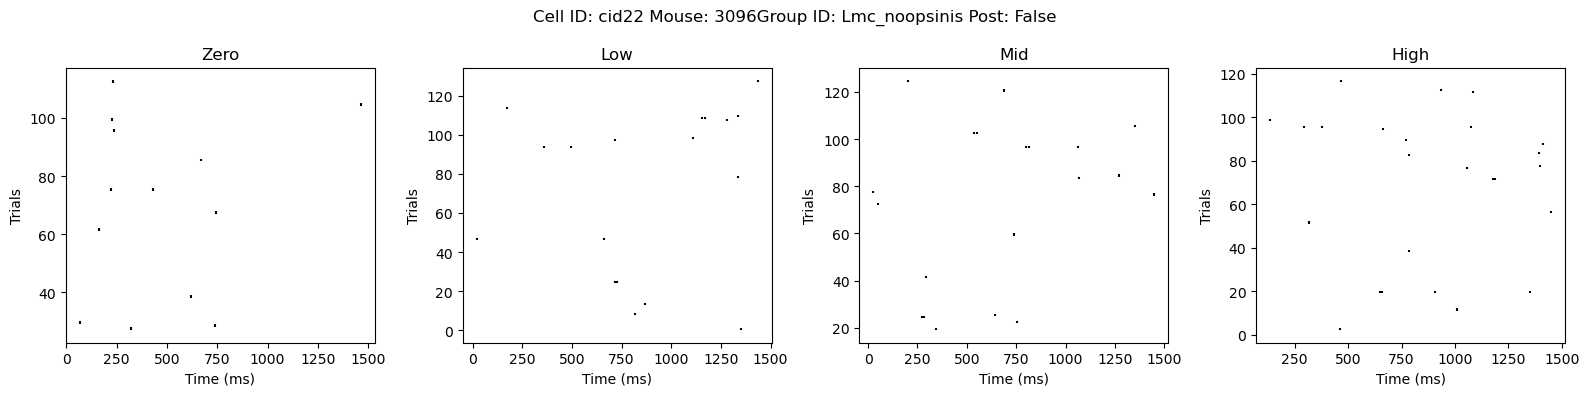

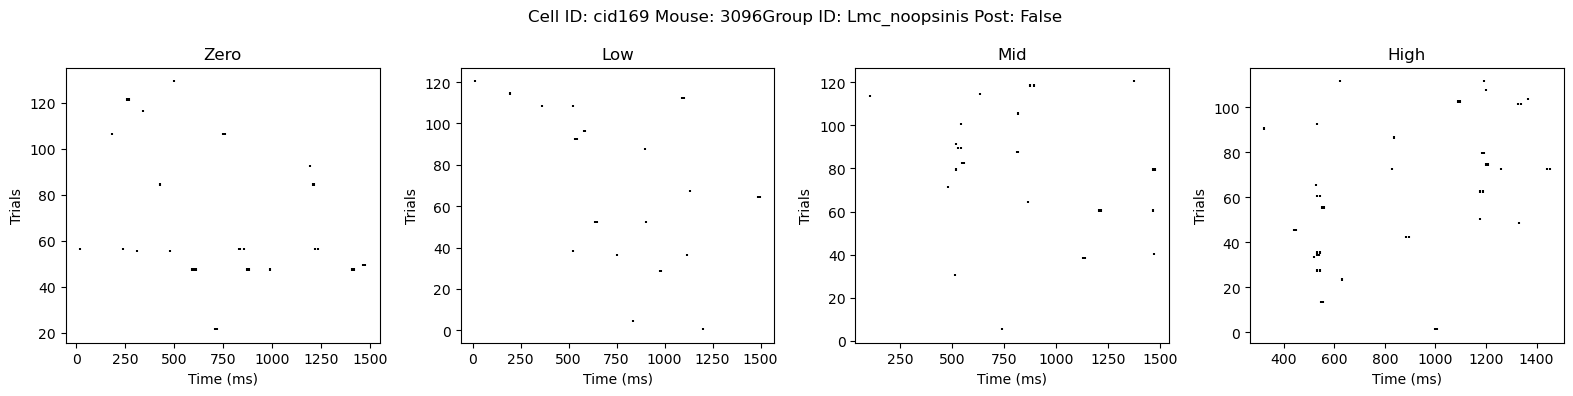

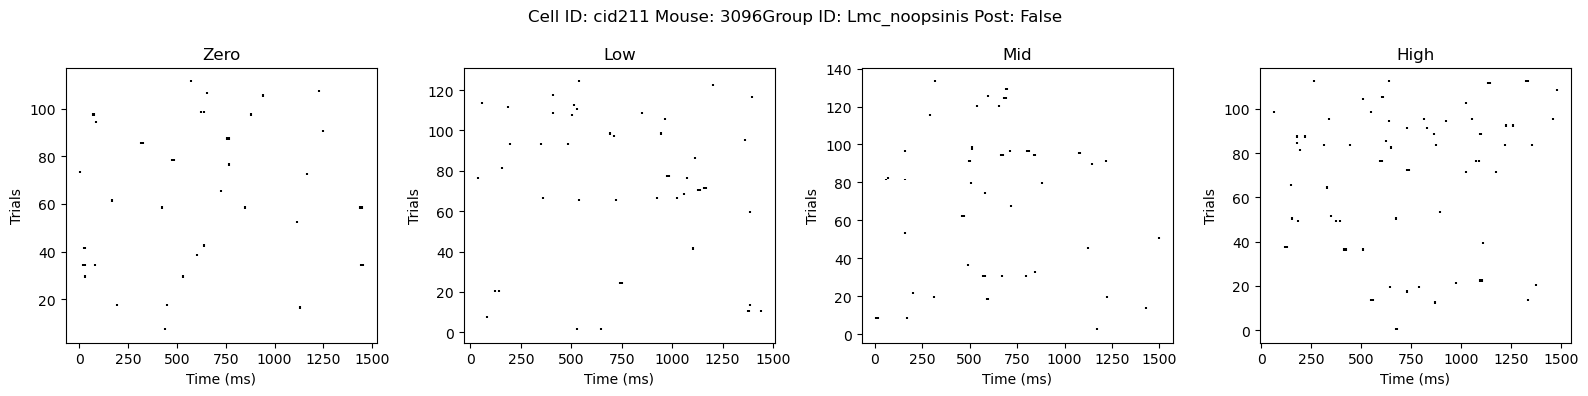

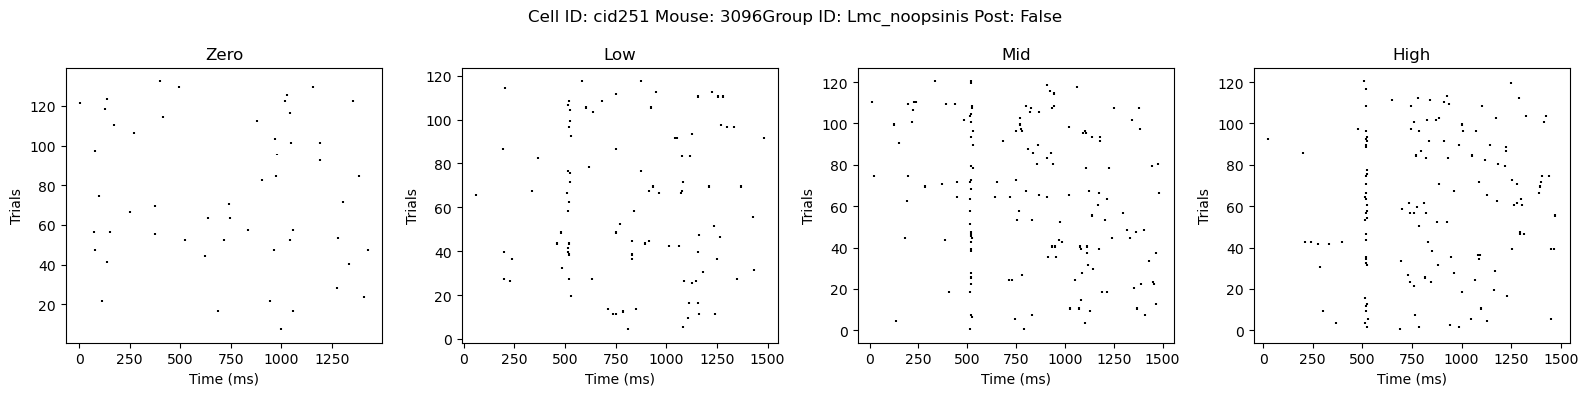

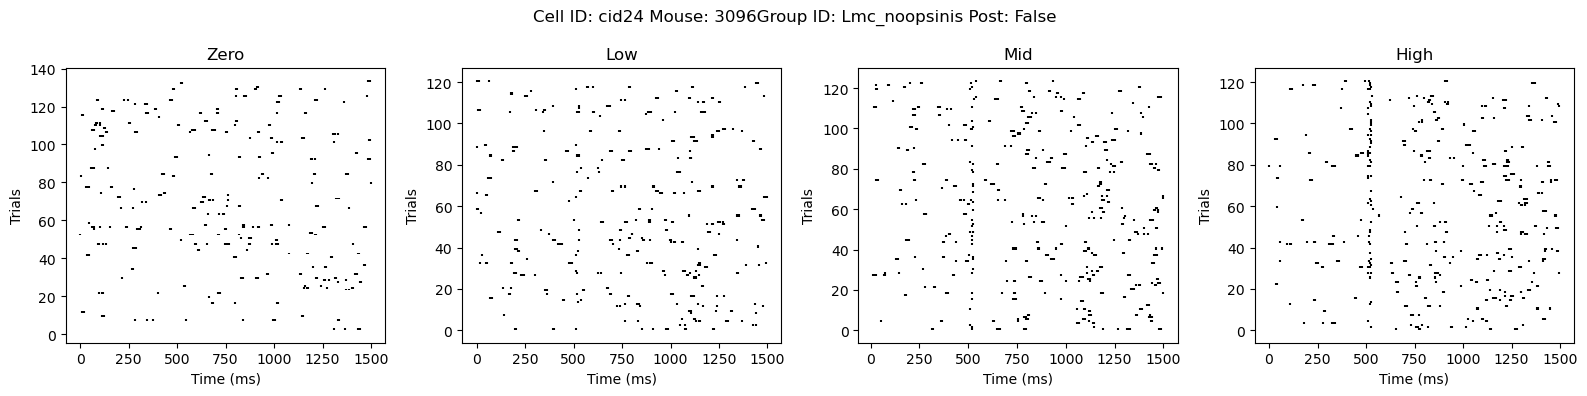

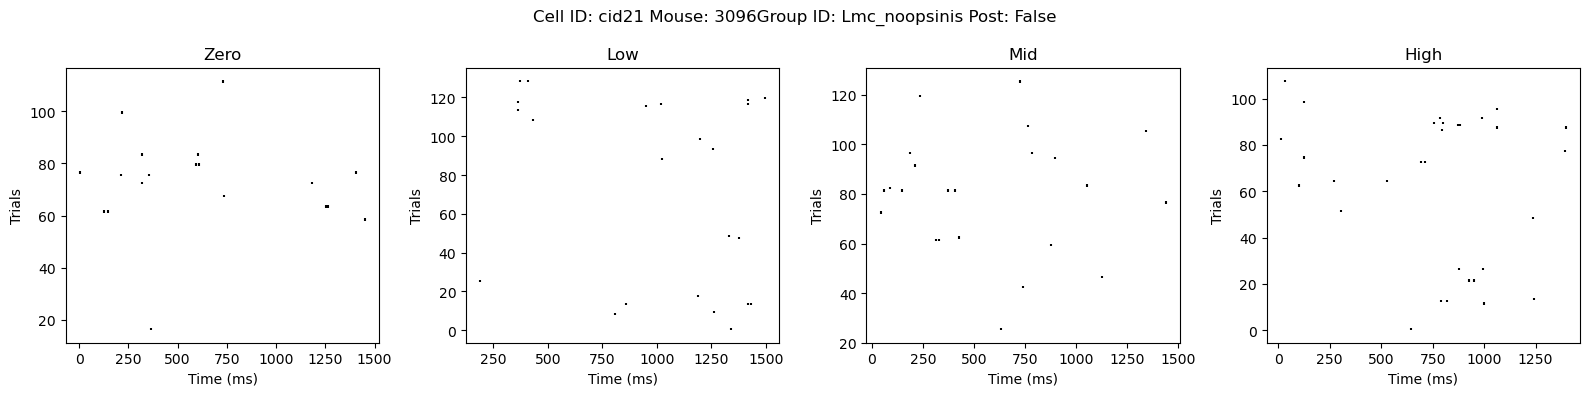

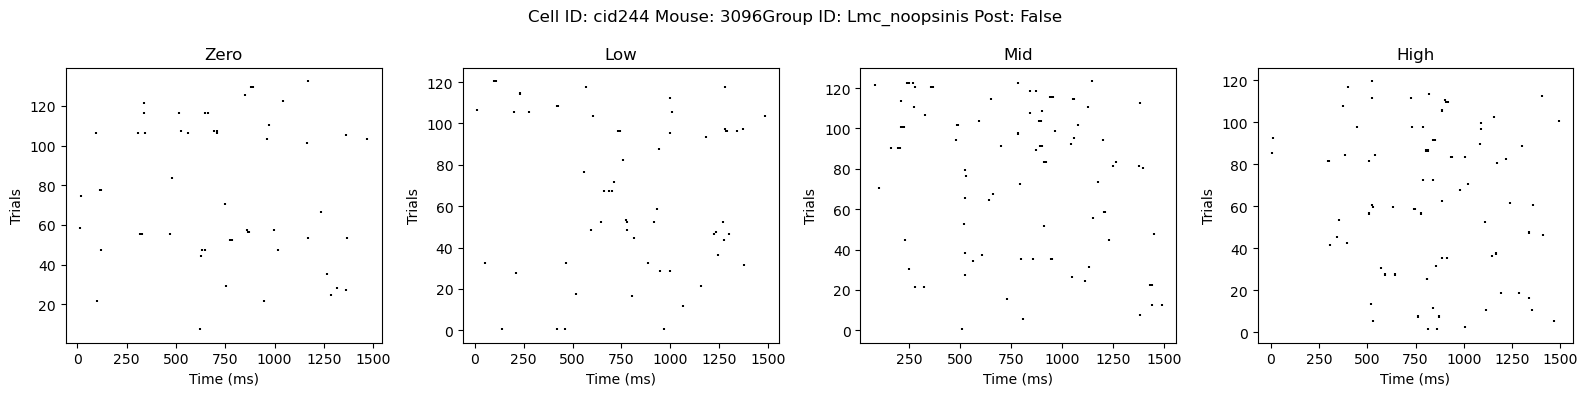

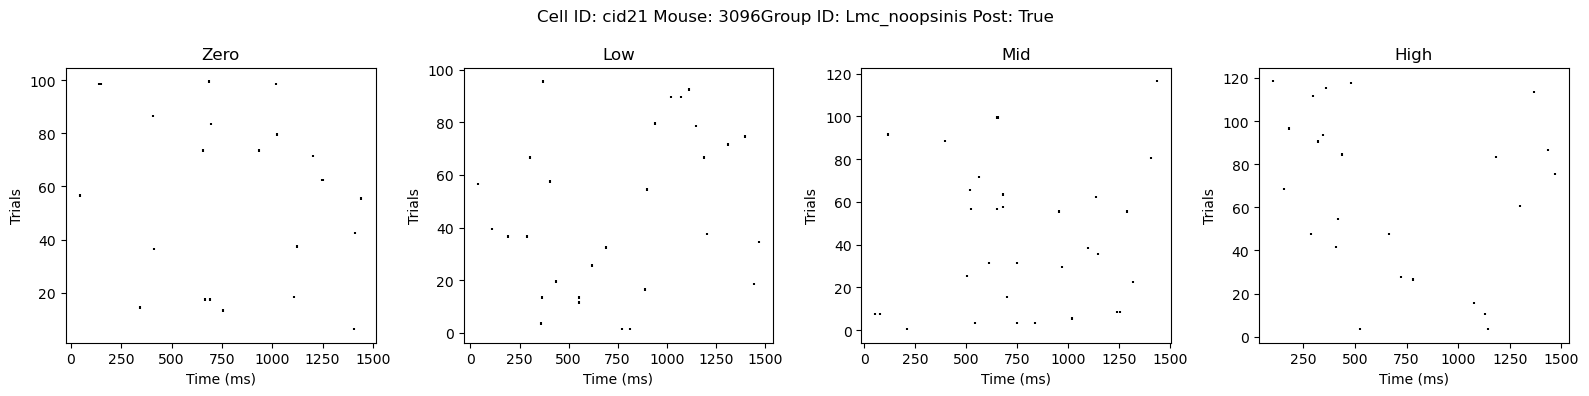

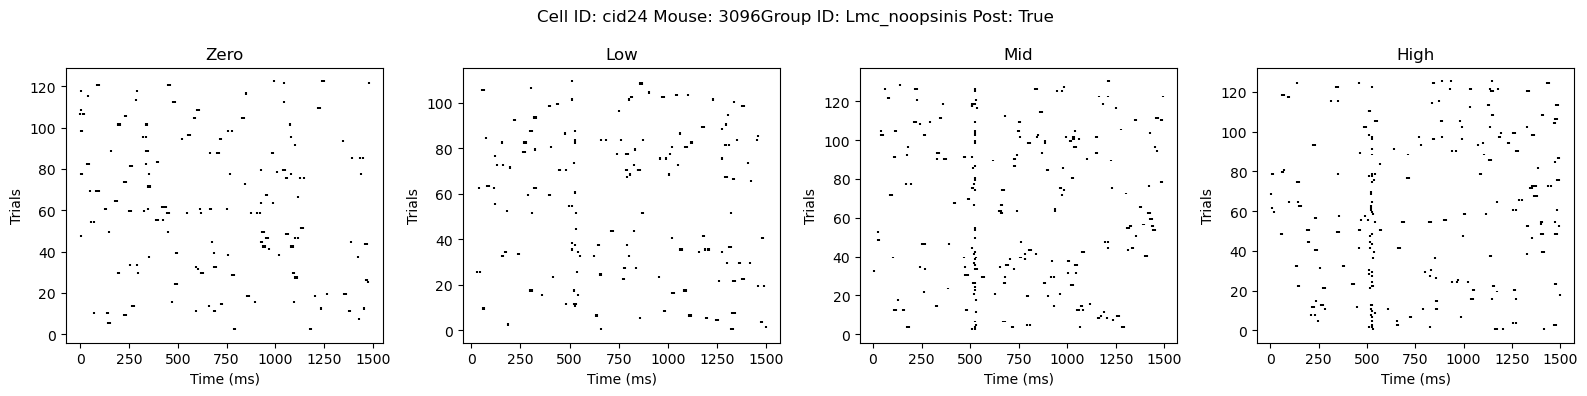

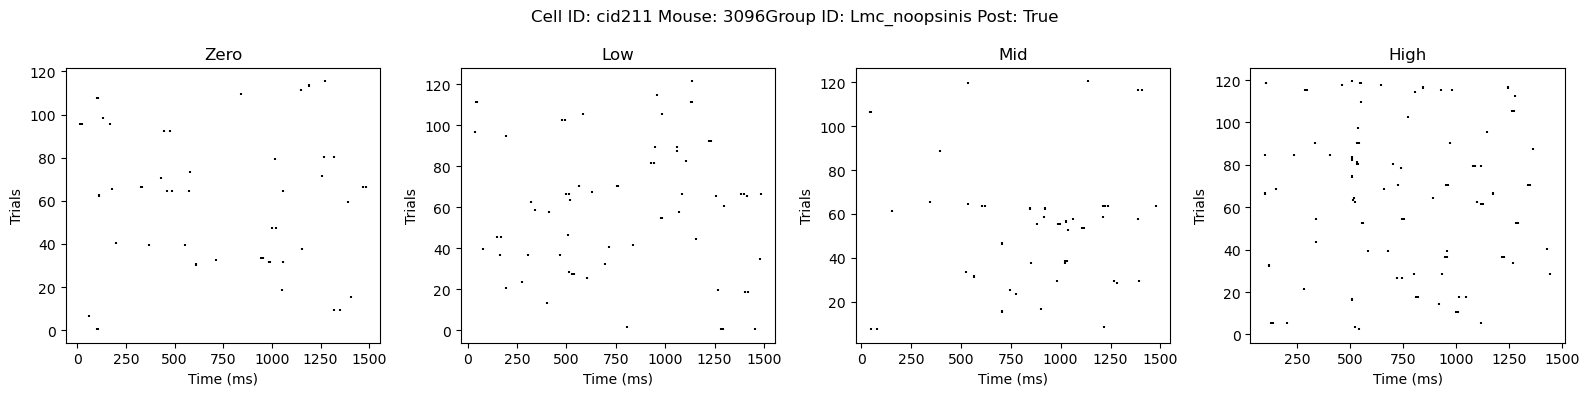

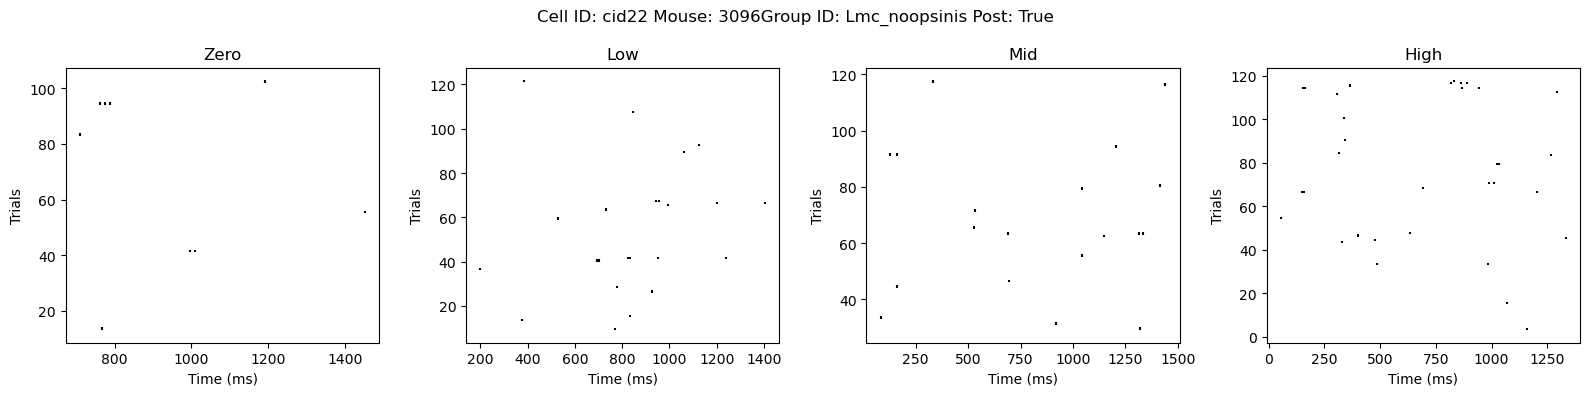

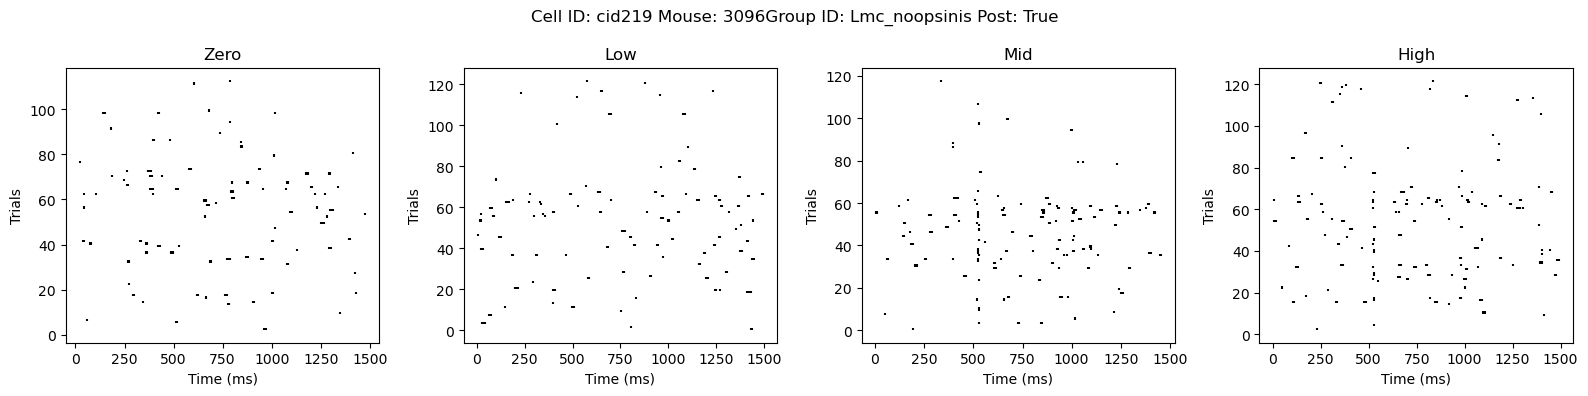

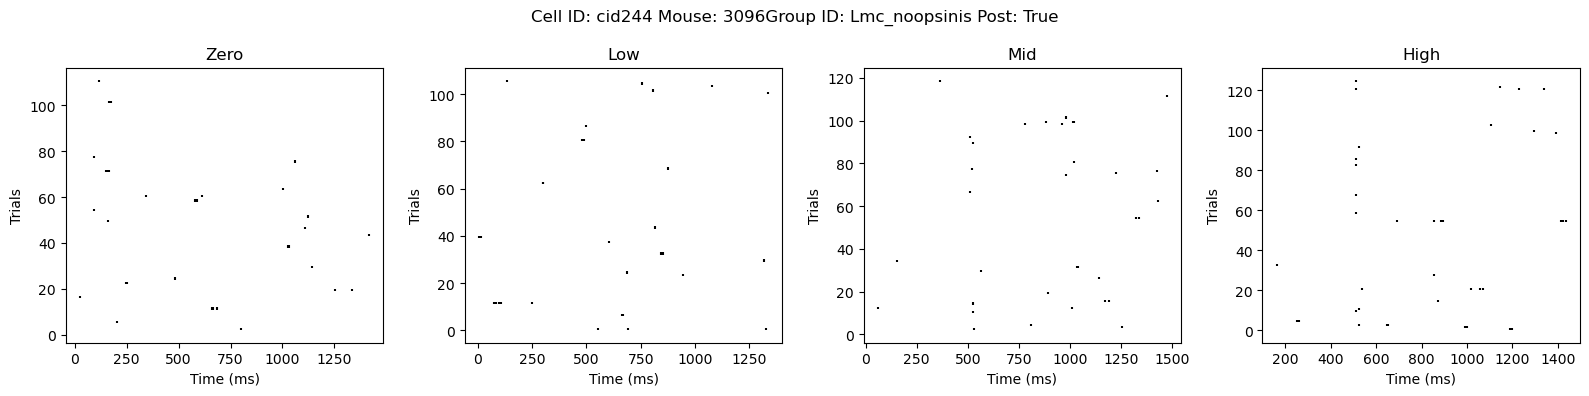

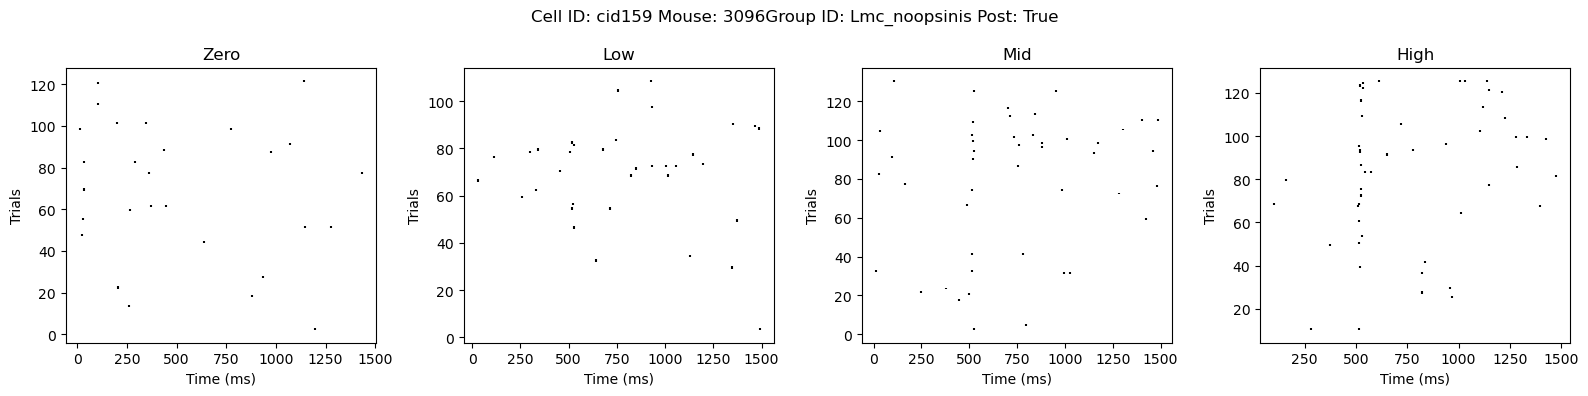

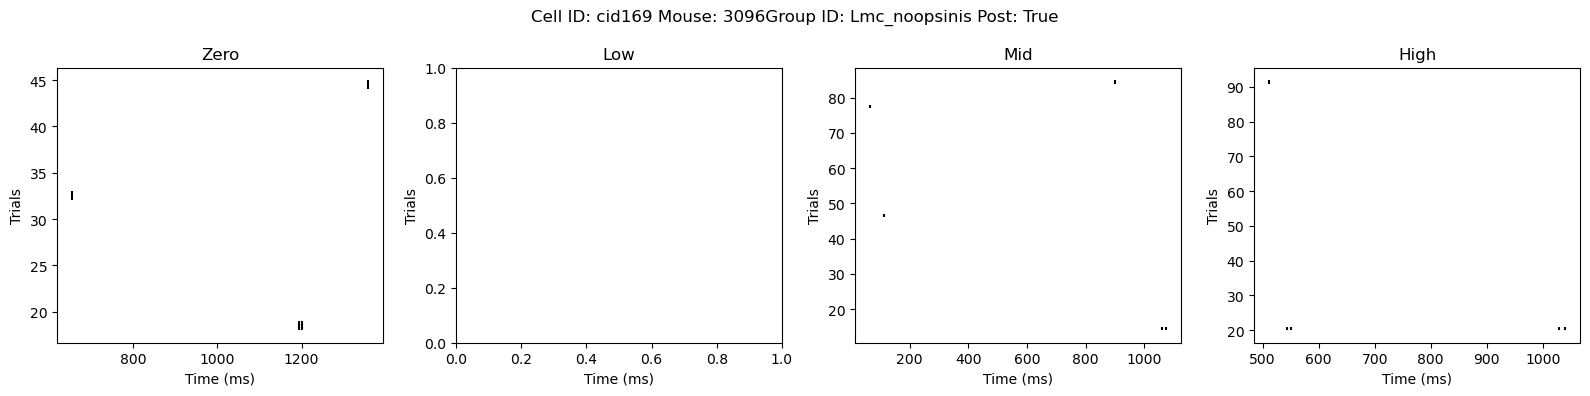

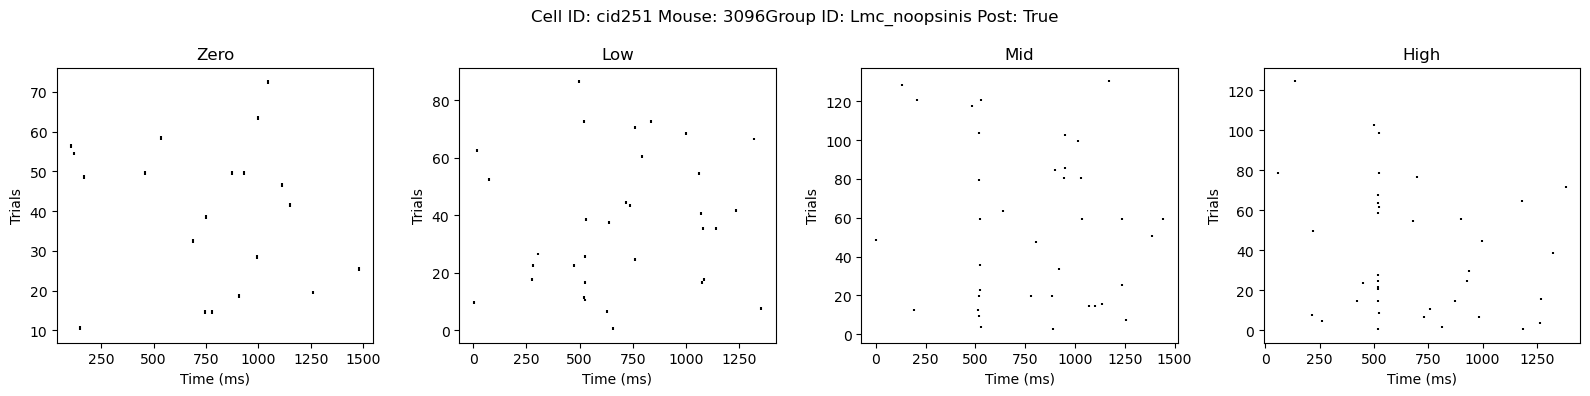

In [13]:
#now create a function that is similar to the one above but it will loop through the unique cell ids instead for plotting the raster plots
def plot_raster_plots_from_unique_cell_ids(group_name, mouse_id, pre_or_post):
    #create a dataframe that has the user input group name, mouse id, and pre or post 
    user_input_df = spikes_df[(spikes_df['group_name'] == group_name) & (spikes_df['mouse_id'] == mouse_id) & (spikes_df['is_post'] == pre_or_post)]
    
    #check if the dataframe is empty
    if user_input_df.empty:
        print('No data found for the given input.')
        return None
    
    #Loop through the unique cell ids and plot the raster plots for each cell id as before 
    for cell_id in user_input_df['cell_id'].unique():
        #now create four numpy matrices from the dataframe based on the true values in the zero, low, mid, high columns
        zero_matrix = user_input_df[(user_input_df['zero'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
        low_matrix = user_input_df[(user_input_df['low'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
        mid_matrix = user_input_df[(user_input_df['mid'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
        high_matrix = user_input_df[(user_input_df['high'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
        
        #create a list of the four matrices
        matrices_list = [zero_matrix, low_matrix, mid_matrix, high_matrix]
        
        #now plot the raster plots for each matrix in a subplot 
        fig, axs = plt.subplots(1, 4, figsize=(16, 4))
        for i in range(len(matrices_list)):
            #loop through the rows in the matrix
            for ii in range(matrices_list[i].shape[0]):
                spike_times = np.where(matrices_list[i][ii] == 1)[0]
                axs[i].vlines(spike_times, ii, ii+1, color='black')
                axs[i].set_ylabel('Trials')
                axs[i].set_xlabel('Time (ms)')
                #make each matrix tittle the stimulus intensity 
                if i == 0:
                    axs[i].set_title('Zero')
                elif i == 1:
                    axs[i].set_title('Low')
                elif i == 2:
                    axs[i].set_title('Mid')
                elif i == 3:
                    axs[i].set_title('High')
                    
        #make the title of each of the figures list the cell id, mouse id, and pre or post somewhere on the figure
        fig.suptitle('Cell ID: ' + str(cell_id) + ' Mouse: ' + str(mouse_id) + 'Group ID: ' + str(group_name) + 'is Post: ' + str(pre_or_post))
                    
        #make sure the text of set_title is not overlapping with the subplots
        fig.tight_layout()
        
        
        #now append the figure to a list of figures for the next cell id
        #fig_list.append(fig)
        
        #show the figure
        plt.show()
        
#call the function to plot the raster plots for each unique cell id 

#plot_raster_plots_from_unique_cell_ids('Lmc_opsin', '3093', True) #this will plot the raster plots for each unique cell id in the dataframe for the given group name, mouse id, and pre or post
plot_raster_plots_from_unique_cell_ids('Lmc_noopsin', '3096', False)     
plot_raster_plots_from_unique_cell_ids('Lmc_noopsin', '3096', True)
        
    

In [29]:
def calculate_sum_of_spikes(group_name, mouse_id, pre_or_post):
    #create a dataframe that has the user input group name, mouse id, and pre or post
    user_input_df = spikes_df[(spikes_df['group_name'] == group_name) & (spikes_df['mouse_id'] == mouse_id) & (spikes_df['is_post'] == pre_or_post)]
    
    #check if the dataframe is empty
    if user_input_df.empty:
        print('No data found for the given input.')
        return None
    
    #create an empty dataframe that will store the sum of the spikes in each matrix
    sum_of_spikes_df = pd.DataFrame()
    
    #Loop through the unique cell ids and calculate the sum of the spikes in each matrix for each cell id
    for cell_id in user_input_df['cell_id'].unique():
        #now create four numpy matrices from the dataframe based on the true values in the zero, low, mid, high columns
        zero_matrix = user_input_df[(user_input_df['zero'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
        low_matrix = user_input_df[(user_input_df['low'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
        mid_matrix = user_input_df[(user_input_df['mid'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
        high_matrix = user_input_df[(user_input_df['high'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]

        #calculate the sum of the spikes in each matrix by summing down the columns
        zero_matrix_sum = np.sum(zero_matrix, axis = 0)
        low_matrix_sum = np.sum(low_matrix, axis = 0)
        mid_matrix_sum = np.sum(mid_matrix, axis = 0)
        high_matrix_sum = np.sum(high_matrix, axis = 0)
        
        #print the shape of each matrix 
        print('The shape of the zero matrix is: ', zero_matrix_sum.shape)
        print('The shape of the low matrix is: ', low_matrix_sum.shape)
        print('The shape of the mid matrix is: ', mid_matrix_sum.shape)
        print('The shape of the high matrix is: ', high_matrix_sum.shape)
        
        #insert the entire array into a list and then insert the list into the dataframe that has four columns called zero_sum_array, low_sum_array, mid_sum_array, high_sum_array and matches the cell id, mouse id, group name, and pre or post of this cell id
        sum_of_spikes_dict = {'zero_sum_array': [zero_matrix_sum], 'low_sum_array': [low_matrix_sum], 'mid_sum_array': [mid_matrix_sum], 'high_sum_array': [high_matrix_sum]}

        #store the dictionary in a dataframe where the 1500 array is in a separate column
        sum_of_spikes_df_temp = pd.DataFrame(sum_of_spikes_dict)
        
        #now add the cell id, mouse id, group name, and pre or post to the dataframe of the corresponding cell id 
        sum_of_spikes_df_temp['cell_id'] = cell_id
        sum_of_spikes_df_temp['mouse_id'] = mouse_id
        sum_of_spikes_df_temp['group_name'] = group_name
        sum_of_spikes_df_temp['is_post'] = pre_or_post
        
        #append the dataframe to the empty dataframe 
        sum_of_spikes_df = pd.concat([sum_of_spikes_df, sum_of_spikes_df_temp], ignore_index=True)
    #return the dataframe
    return sum_of_spikes_df

#call the function to calculate the sum of the spikes in each matrix for each cell id   
sum_of_spikes_df = calculate_sum_of_spikes('Lmc_opsin', '3093', False) #this will calculate the sum of the spikes in each matrix for each cell id in the dataframe for the given group name, mouse id, and pre or post


#create a function that will do the same as above but will automatically loop through each group name, then mouse id, then pre or post for each cell id to create one dataframe that has the sum of the spikes in each matrix for each cell id
def calculate_sum_of_spikes_for_all_cell_ids():
    
    #check if the dataframe is empty
    if spikes_df.empty:
        print('No data found for the given input.')
        return None

    #create an empty dataframe that will store the sum of the spikes in each matrix
    sum_of_spikes_df = pd.DataFrame()
    
    #loop through the unique group names
    for group_name in spikes_df['group_name'].unique():
        #loop through the unique mouse ids
        for mouse_id in spikes_df['mouse_id'].unique():
            #loop through the unique pre or post
            for pre_or_post in spikes_df['is_post'].unique():
                #create a dataframe that has the user input group name, mouse id, and pre or post
                user_input_df = spikes_df[(spikes_df['group_name'] == group_name) & (spikes_df['mouse_id'] == mouse_id) & (spikes_df['is_post'] == pre_or_post)]

                #Loop through the unique cell ids and calculate the sum of the spikes in each matrix for each cell id
                for cell_id in user_input_df['cell_id'].unique():
                    #now create four numpy matrices from the dataframe based on the true values in the zero, low, mid, high columns
                    zero_matrix = user_input_df[(user_input_df['zero'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
                    low_matrix = user_input_df[(user_input_df['low'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
                    mid_matrix = user_input_df[(user_input_df['mid'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
                    high_matrix = user_input_df[(user_input_df['high'] == True) & (user_input_df['cell_id'] == cell_id)]['spikes'].iloc[0]
                    
                    #calculate the sum of the spikes in each matrix by summing down the columns
                    zero_matrix_sum = np.sum(zero_matrix, axis = 0)
                    low_matrix_sum = np.sum(low_matrix, axis = 0)
                    mid_matrix_sum = np.sum(mid_matrix, axis = 0)
                    high_matrix_sum = np.sum(high_matrix, axis = 0)
                    
                    #print the shape of each matrix for the user to check
                    print('The shape of the zero matrix is: ', zero_matrix_sum.shape)
                    print('The shape of the low matrix is: ', low_matrix_sum.shape)
                    print('The shape of the mid matrix is: ', mid_matrix_sum.shape)
                    print('The shape of the high matrix is: ', high_matrix_sum.shape)
                    
                    #insert the entire array into a list and then insert the list into the dataframe that has four columns called zero_sum_array, low_sum_array, mid_sum_array, high_sum_array and matches the cell id, mouse id, group name, and pre or post of this cell id
                    sum_of_spikes_dict = {'zero_sum_array': [zero_matrix_sum], 'low_sum_array': [low_matrix_sum], 'mid_sum_array': [mid_matrix_sum], 'high_sum_array': [high_matrix_sum]}
                    
                    #store the dictionary in a dataframe where the 1500 array is in a separate column
                    sum_of_spikes_df_temp = pd.DataFrame(sum_of_spikes_dict)
                    
                    #now add the cell id, mouse id, group name, and pre or post to the dataframe of the corresponding cell id
                    sum_of_spikes_df_temp['cell_id'] = cell_id
                    sum_of_spikes_df_temp['mouse_id'] = mouse_id
                    sum_of_spikes_df_temp['group_name'] = group_name
                    sum_of_spikes_df_temp['is_post'] = pre_or_post

                    #append the dataframe to the empty dataframe
                    sum_of_spikes_df = pd.concat([sum_of_spikes_df, sum_of_spikes_df_temp], ignore_index=True)

    #return the dataframe
    return sum_of_spikes_df

#call the function to calculate the sum of the spikes in each matrix for each cell id for all group names, mouse ids, and pre or post   
sum_of_all_cellids_spikes_df = calculate_sum_of_spikes_for_all_cell_ids() #this will calculate the sum of the spikes in each matrix for each cell id in the dataframe for all group names, mouse ids, and pre or post


                    
                    
        

The shape of the zero matrix is:  (1500,)
The shape of the low matrix is:  (1500,)
The shape of the mid matrix is:  (1500,)
The shape of the high matrix is:  (1500,)
The shape of the zero matrix is:  (1500,)
The shape of the low matrix is:  (1500,)
The shape of the mid matrix is:  (1500,)
The shape of the high matrix is:  (1500,)
The shape of the zero matrix is:  (1500,)
The shape of the low matrix is:  (1500,)
The shape of the mid matrix is:  (1500,)
The shape of the high matrix is:  (1500,)
The shape of the zero matrix is:  (1500,)
The shape of the low matrix is:  (1500,)
The shape of the mid matrix is:  (1500,)
The shape of the high matrix is:  (1500,)
The shape of the zero matrix is:  (1500,)
The shape of the low matrix is:  (1500,)
The shape of the mid matrix is:  (1500,)
The shape of the high matrix is:  (1500,)
The shape of the zero matrix is:  (1500,)
The shape of the low matrix is:  (1500,)
The shape of the mid matrix is:  (1500,)
The shape of the high matrix is:  (1500,)
The 

In [13]:
#which pandas version are you using?
pd.__version__


'1.5.3'

In [ ]:
#make a function that will loop through thr dictionary keys and create a dataframe per key and append it the to the dataframe 

def spiketrains_df(spiketrains_dict):
    #first loop through the the keys in the dictionary and create a dataframe for each key at the end of the loop append the dataframe to the main dataframe

    #create an empty dataframe called main_df
    main_df = pd.DataFrame()
    
    #create a list of column names that will be used for the main dataframe column names
    column_names = ['trial_name','trial_id','spikes', 'zero','low','mid','high']
    
    
    #loop through the keys in the dictionary
    #for each key determine the numbner of trials which is the number of rows of the matrix
    #then loop through the number of rows, create the trial_id which is the row number, add the row number to the trial_number column
    #then pull out the row slice of the matrix and add it to the corresponding spikes column
    #then add the trial name to the trial_name column
    
    for key in spiketrains_dict:
        
        #determine the number of trials which is the number of rows of the matrix
        num_trials = spiketrains_dict[key].shape[0]
        
        #iterate through the number of trials of the matrix and pull out the row slice of the matrix, store the row number as the trial_id in the main_df
        for trial in range(num_trials):
                
                #create a dataframe for each trial
                trial_df = pd.DataFrame()
                
                #add the trial_id to the trial_id column
                trial_df['trial_id'] = [trial]
                
                #add the spikes to the spikes column, pull out the row slice of the matrix
                trial_df['spikes'] = [spiketrains_dict[key][trial,:]]
                
                #add the trial name to the trial_name column
                trial_df['trial_name'] = [key]
                
                #check if the trial name is pre or post and TRUE in the column 'is_post'
                if 'post' in key:
                    trial_df['is_post'] = True
                else:
                    trial_df['is_post'] = False
                    
                #check if the trial name is zero, low, mid, or high and TRUE in the corresponding columnm if not FALSE
                if 'zero' in key:
                    trial_df['zero'] = True
                    trial_df['low'] = False
                    trial_df['mid'] = False
                    trial_df['high'] = False
                elif 'low' in key:
                    trial_df['zero'] = False
                    trial_df['low'] = True
                    trial_df['mid'] = False
                    trial_df['high'] = False
                elif 'mid' in key:
                    trial_df['zero'] = False
                    trial_df['low'] = False
                    trial_df['mid'] = True
                    trial_df['high'] = False
                elif 'high' in key:
                    trial_df['zero'] = False
                    trial_df['low'] = False
                    trial_df['mid'] = False
                    trial_df['high'] = True
                    
                #check if there are at least 2 spikes in the trial, if there are more than 2 spike then TRUE in the column 'more_than_2' or FALSE if there are less than 2 spikes
                if np.sum(spiketrains_dict[key][trial,:]) > 2:
                    trial_df['more_than_2'] = True
                else:
                    trial_df['more_than_2'] = False        
                    
                    
                #check if there are more than 50 spikes in the trial, if there are more than 50 spikes then TRUE in the column 'more_than_50' or FALSE if there are less than 50 spikes
                if np.sum(spiketrains_dict[key][trial,:]) > 50:
                    trial_df['more_than_50'] = True
                else:
                    trial_df['more_than_50'] = False
                
                #append the trial_df to the main_df
                main_df = main_df.append(trial_df)
                
    #reset the index of the main_df
    main_df = main_df.reset_index(drop=True)
    
        
    return main_df

#call the function to create the dataframe
main_df = spiketrains_df(spiketrains_dict)
    
#now         

In [ ]:
#make a function to calculate the mean firing rate for each stimulus frequency from dict of spike matrices and return a dict of mean firing rates where the keys are the stimulus frequencies
def mean_firing_rate_dict(spiketrains_dict):
    mean_firing_rate_dict = {}
    for key in spiketrains_dict:
        mean_firing_rate_dict[key] = np.mean(spiketrains_dict[key], axis=0)*1000 #multiply by 1000 to convert to Hz
    return mean_firing_rate_dict

#call the function to create the dictionary of mean firing rates
mean_firing_rate_dict = mean_firing_rate_dict(spiketrains_dict)


In [ ]:
#gaussian filter the mean firing rates with user defined sigma and return a dict of gaussian filtered mean firing rates where the keys are the stimulus frequencies

from scipy.ndimage import gaussian_filter

#create a function to gaussian filter the mean firing rates with user defined sigma and return a dict of gaussian filtered mean firing rates where the keys are the stimulus frequencies
def gaussian_filter_dict(mean_firing_rate_dict, sigma):
    gaussian_filter_dict = {}
    for key in mean_firing_rate_dict:
        gaussian_filter_dict[key] = gaussian_filter(mean_firing_rate_dict[key], sigma=sigma)
    return gaussian_filter_dict

#call the function to create the dictionary of gaussian filtered mean firing rates
gaussian_filter_dict = gaussian_filter_dict(mean_firing_rate_dict, sigma=5)


#plot the gaussian filtered mean firing rates for the pre and post stimulus conditions on the same plot
def plot_gaussian_filter_dict(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['pre_high'], label='pre_high')
    ax.plot(gaussian_filter_dict['post_high'], label='post_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Pre and Post Stimulus Conditions')
    
    #add vertical lines to indicate the stimulus onset and offset times 
    ax.axvline(x=500, color='black', linestyle='--')
    
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for the pre and post stimulus conditions on the same plot
plot_gaussian_filter_dict(gaussian_filter_dict)

#plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
# keep the color the same for all prestimulus conditions and change the opacity for each stimulus condition
def plot_gaussian_filter_dict_all(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['pre_zero'], color='grey', alpha=0.25, label='pre_zero')
    ax.plot(gaussian_filter_dict['pre_low'], color='grey', alpha=0.5, label='pre_low')
    ax.plot(gaussian_filter_dict['pre_mid'], color='grey', alpha=0.75, label='pre_mid')
    ax.plot(gaussian_filter_dict['pre_high'], color='grey', alpha=1, label='pre_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Pre Stimulus Conditions')
    
    #add vertical lines to indicate the stimulus onset and offset times 
    ax.axvline(x=500, color='black', linestyle='--')
    
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all(gaussian_filter_dict)


#now repeat the above for the post stimulus conditions
#plot the gaussian filtered mean firing rates for all poststimulus conditions on the same plot with increasing opacity for increasing stimuli
# keep the color the same for all poststimulus conditions and change the opacity for each stimulus condition
def plot_gaussian_filter_dict_all_post(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['post_zero'], color='blue', alpha=0.25, label='post_zero')
    ax.plot(gaussian_filter_dict['post_low'], color='blue', alpha=0.5, label='post_low')
    ax.plot(gaussian_filter_dict['post_mid'], color='blue', alpha=0.75, label='post_mid')
    ax.plot(gaussian_filter_dict['post_high'], color='blue', alpha=1, label='post_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Post Stimulus Conditions')
    
    #add vertical lines to indicate the stimulus onset and offset times 
    ax.axvline(x=500, color='black', linestyle='--')
    
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all poststimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all_post(gaussian_filter_dict)

#now the same but zoom in from 459 to 550 ms
#plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
# keep the color the same for all prestimulus conditions and change the opacity for each stimulus condition
def plot_gaussian_filter_dict_all_zoom(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['pre_zero'][459:550], color='grey', alpha=0.25, label='pre_zero')
    ax.plot(gaussian_filter_dict['pre_low'][459:550], color='grey', alpha=0.5, label='pre_low')
    ax.plot(gaussian_filter_dict['pre_mid'][459:550], color='grey', alpha=0.75, label='pre_mid')
    ax.plot(gaussian_filter_dict['pre_high'][459:550], color='grey', alpha=1, label='pre_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Pre Stimulus Conditions')
        #add vertical lines to indicate the stimulus onset and offset times 
    ax.axvline(x=50, color='black', linestyle='--')
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all_zoom(gaussian_filter_dict)

#now repeat this plot for the post stimulus conditions
#plot the gaussian filtered mean firing rates for all poststimulus conditions on the same plot with increasing opacity for increasing stimuli
# keep the color the same for all poststimulus conditions and change the opacity for each stimulus condition
def plot_gaussian_filter_dict_all_post_zoom(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['post_zero'][459:550], color='blue', alpha=0.25, label='post_zero')
    ax.plot(gaussian_filter_dict['post_low'][459:550], color='blue', alpha=0.5, label='post_low')
    ax.plot(gaussian_filter_dict['post_mid'][459:550], color='blue', alpha=0.75, label='post_mid')
    ax.plot(gaussian_filter_dict['post_high'][459:550], color='blue', alpha=1, label='post_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Post Stimulus Conditions')
    ax.axvline(x=50, color='black', linestyle='--') 
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all poststimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all_post_zoom(gaussian_filter_dict)


#now over lay the zoomed in pre and post stimulus conditions on the same plot

def plot_gaussian_filter_dict_all_zoom_overlay(gaussian_filter_dict):
    fig, ax = plt.subplots(1,1)
    ax.plot(gaussian_filter_dict['pre_zero'][459:550], color='grey', alpha=0.25, label='pre_zero')
    ax.plot(gaussian_filter_dict['pre_low'][459:550], color='grey', alpha=0.5, label='pre_low')
    ax.plot(gaussian_filter_dict['pre_mid'][459:550], color='grey', alpha=0.75, label='pre_mid')
    ax.plot(gaussian_filter_dict['pre_high'][459:550], color='grey', alpha=1, label='pre_high')
    ax.plot(gaussian_filter_dict['post_zero'][459:550], color='blue', alpha=0.25, label='post_zero')
    ax.plot(gaussian_filter_dict['post_low'][459:550], color='blue', alpha=0.5, label='post_low')
    ax.plot(gaussian_filter_dict['post_mid'][459:550], color='blue', alpha=0.75, label='post_mid')
    ax.plot(gaussian_filter_dict['post_high'][459:550], color='blue', alpha=1, label='post_high')
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.set_title('Gaussian Filtered Mean Firing Rates for Pre and Post Stimulus Conditions')
    
    #make the high stimulus conditions more thick to make it easier to see
    ax.plot(gaussian_filter_dict['pre_high'][459:550], color='grey', alpha=1, linewidth=3)
    ax.plot(gaussian_filter_dict['post_high'][459:550], color='blue', alpha=1, linewidth=3)
    
    plt.show()
    return fig, ax

#call the function to plot the gaussian filtered mean firing rates for all prestimulus conditions on the same plot with increasing opacity for increasing stimuli
plot_gaussian_filter_dict_all_zoom_overlay(gaussian_filter_dict)

In [ ]:
#now loop through the keys in the spiketrains_dict and plot a new raster plot for each key
for key in spiketrains_dict:
    spikes = spiketrains_dict[key]
    fig, ax = plt.subplots(1, 1)
    for i in range(spikes.shape[0]):
        spike_times = np.where(spikes[i] == 1)[0]
        ax.vlines(spike_times, i, i+1, color='black')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Trial Number')
    ax.set_title('Raster Plot for ' + key)
    plt.show()
    

In [ ]:
#now plot the same way but using the main_df dataframe as a function
#take user input for 'is_post' being True or False
#for each stimulus type, create a matrix of the spikes where the rows are the trials and the data is the correspding 'spikes' column of the dataframe 
#plot the raster plot for each stimulus type being zero, low, mid, high based on the TRUE or FALSE for zero, low, mid, high columns of the dataframe

def plot_raster_main_df(main_df, is_post):
    #is_post is a boolean value of 1 or 0
    #if is_post is 1, then plot the post stimulus conditions
    #if is_post is 0, then plot the pre stimulus conditions
    
    #filter the dataframe based on the is_post value
    if is_post:
        main_df = main_df[main_df['is_post'] == 1]
        #filter the dataframe per stimulus type which is the TRUE or FALSE value for the zero, low, mid, high columns
        main_df_zero = main_df[main_df['zero'] == 1] 
        main_df_low = main_df[main_df['low'] == 1]
        main_df_mid = main_df[main_df['mid'] == 1]
        main_df_high = main_df[main_df['high'] == 1]
        
        #now plot the raster plot for each stimulus type by creating a matrix of the spikes where the rows are the trials and the data is the correspding 'spikes' column of the dataframe
        #plot the raster plot for each stimulus type being zero, low, mid, high based on the TRUE or FALSE for zero, low, mid, high columns of the dataframe
        #plot each raster on a new figure
        fig, ax = plt.subplots(1, 1)
        for i in range(main_df_zero.shape[0]):  
            spike_times = np.where(main_df_zero['spikes'].iloc[i] == 1)[0]
            ax.vlines(spike_times, i, i+1, color='black')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Trial Number')
        ax.set_title('Raster Plot for Post Zero')
        
        fig, ax = plt.subplots(1, 1)
        for i in range(main_df_low.shape[0]):
            spike_times = np.where(main_df_low['spikes'].iloc[i] == 1)[0]
            ax.vlines(spike_times, i, i+1, color='black')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Trial Number')
        ax.set_title('Raster Plot for Post Low')
        
        fig, ax = plt.subplots(1, 1)    
        for i in range(main_df_mid.shape[0]):
            spike_times = np.where(main_df_mid['spikes'].iloc[i] == 1)[0]
            ax.vlines(spike_times, i, i+1, color='black')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Trial Number')
        ax.set_title('Raster Plot for Post Mid')
        
        fig, ax = plt.subplots(1, 1)
        for i in range(main_df_high.shape[0]):
            spike_times = np.where(main_df_high['spikes'].iloc[i] == 1)[0]
            ax.vlines(spike_times, i, i+1, color='black')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Trial Number')
        ax.set_title('Raster Plot for Post High')
    #if is_post is 0, then plot the pre stimulus conditions
    else:
        main_df = main_df[main_df['is_post'] == 0]
        
        #filter the dataframe per stimulus type which is the TRUE or FALSE value for the zero, low, mid, high columns
        main_df_zero = main_df[main_df['zero'] == 1]
        main_df_low = main_df[main_df['low'] == 1]
        main_df_mid = main_df[main_df['mid'] == 1]
        main_df_high = main_df[main_df['high'] == 1]
    
        #now plot the raster plot for each stimulus type by creating a matrix of the spikes where the rows are the trials and the data is the correspding 'spikes' column of the dataframe
        #plot the raster plot for each stimulus type being zero, low, mid, high based on the TRUE or FALSE for zero, low, mid, high columns of the dataframe
        #plot each raster on a new figure
        fig, ax = plt.subplots(1, 1)
        for i in range(main_df_zero.shape[0]):
            spike_times = np.where(main_df_zero['spikes'].iloc[i] == 1)[0]
            ax.vlines(spike_times, i, i+1, color='black')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Trial Number')
        ax.set_title('Raster Plot for Pre Zero')
        
        fig, ax = plt.subplots(1, 1)
        for i in range(main_df_low.shape[0]):
            spike_times = np.where(main_df_low['spikes'].iloc[i] == 1)[0]
            ax.vlines(spike_times, i, i+1, color='black')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Trial Number')
        ax.set_title('Raster Plot for Pre Low')
        
        fig, ax = plt.subplots(1, 1)
        for i in range(main_df_mid.shape[0]):
            spike_times = np.where(main_df_mid['spikes'].iloc[i] == 1)[0]
            ax.vlines(spike_times, i, i+1, color='black')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Trial Number')
        ax.set_title('Raster Plot for Pre Mid')

        fig, ax = plt.subplots(1, 1)
        for i in range(main_df_high.shape[0]):
            spike_times = np.where(main_df_high['spikes'].iloc[i] == 1)[0]
            ax.vlines(spike_times, i, i+1, color='black')
        ax.set_xlabel('Time (ms)') 
        ax.set_ylabel('Trial Number')
        ax.set_title('Raster Plot for Pre High')
        
    #now display all the figure
    plt.show()
    return

#call the nunction to plot the raster plot for the pre stimulus conditions
plot_raster_main_df(main_df, 1)



In [ ]:
#create a function that will filter the main_df datarame
#take user input for input for true or false for is_post 
#then in a iterative manner, 1) filter the dataframe by zero, low, mid, high 2) filter the dataframe by no_spike being FALSE and more_than_50 being TRUE 3) plot the raster plot for each stimulus as a new plot 
def plot_raster_main_df_no_spike(main_df, is_post):
   #is_post is a boolean value of 1 or 0
   #if is_post is 1, then plot the post stimulus conditions
   #if is_post is 0, then plot the pre stimulus conditions
   #filter the dataframe by is_post being TRUE or FALSE
   if is_post == 1:
      #filter the dataframe by is_post being TRUE
      main_df = main_df[main_df['is_post'] == 1]
      #filter the dataframe per stimulus type which is the TRUE or FALSE value for the zero, low, mid, high columns AND filter the dataframe by no_spike being FALSE and more_than_50 being FALSE conditions
      main_df_zero = main_df[(main_df['zero'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
      main_df_low = main_df[(main_df['low'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
      main_df_mid = main_df[(main_df['mid'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
      main_df_high = main_df[(main_df['high'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]

      #now plot the raster plot for each stimulus type by creating a matrix of the spikes where the rows are the trials and the data is the correspding 'spikes' column of the dataframe
      #plot the raster plot for each stimulus type being zero, low, mid, high based on the TRUE or FALSE for zero, low, mid, high columns of the dataframe
      #plot each raster on a new figure   
      fig, ax = plt.subplots(1, 1)
      for i in range(main_df_zero.shape[0]):
         spike_times = np.where(main_df_zero['spikes'].iloc[i] == 1)[0]
         ax.vlines(spike_times, i, i+1, color='black')
      ax.set_xlabel('Time (ms)')
      ax.set_ylabel('Trial Number') 
      ax.set_title('Raster Plot for Post Zero')

      fig, ax = plt.subplots(1, 1)
      for i in range(main_df_low.shape[0]):
         spike_times = np.where(main_df_low['spikes'].iloc[i] == 1)[0]
         ax.vlines(spike_times, i, i+1, color='black')
      ax.set_xlabel('Time (ms)')
      ax.set_ylabel('Trial Number')
      ax.set_title('Raster Plot for Post Low ')

      fig, ax = plt.subplots(1, 1)
      for i in range(main_df_mid.shape[0]):
         spike_times = np.where(main_df_mid['spikes'].iloc[i] == 1)[0]
         ax.vlines(spike_times, i, i+1, color='black')
      ax.set_xlabel('Time (ms)')
      ax.set_ylabel('Trial Number')
      ax.set_title('Raster Plot for Post Mid')

      fig, ax = plt.subplots(1, 1)
      for i in range(main_df_high.shape[0]):
         spike_times = np.where(main_df_high['spikes'].iloc[i] == 1)[0]
         ax.vlines(spike_times, i, i+1, color='black')
      ax.set_xlabel('Time (ms)')
      ax.set_ylabel('Trial Number')
      ax.set_title('Raster Plot for Post High')   

   else: 
      #filter the dataframe by is_post being FALSE
      main_df = main_df[main_df['is_post'] == 0]
      #filter the dataframe per stimulus type which is the TRUE or FALSE value for the zero, low, mid, high columns AND filter the dataframe by no_spike being FALSE and more_than_50 being FALSE conditions
      main_df_zero = main_df[(main_df['zero'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
      main_df_low = main_df[(main_df['low'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
      main_df_mid = main_df[(main_df['mid'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
      main_df_high = main_df[(main_df['high'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]

      #now plot the raster plot for each stimulus type by creating a matrix of the spikes where the rows are the trials and the data is the correspding 'spikes' column of the dataframe
      #plot the raster plot for each stimulus type being zero, low, mid, high based on the TRUE or FALSE for zero, low, mid, high columns of the dataframe
      #plot each raster on a new figure
      fig, ax = plt.subplots(1, 1)
      for i in range(main_df_zero.shape[0]):
         spike_times = np.where(main_df_zero['spikes'].iloc[i] == 1)[0]
         ax.vlines(spike_times, i, i+1, color='black')
      ax.set_xlabel('Time (ms)')
      ax.set_ylabel('Trial Number')
      ax.set_title('Raster Plot for Pre Zero')
      
      fig, ax = plt.subplots(1, 1)
      for i in range(main_df_low.shape[0]):
         spike_times = np.where(main_df_low['spikes'].iloc[i] == 1)[0]
         ax.vlines(spike_times, i, i+1, color='black')
      ax.set_xlabel('Time (ms)')
      ax.set_ylabel('Trial Number')
      ax.set_title('Raster Plot for Pre Low')
      
      fig, ax = plt.subplots(1, 1)
      for i in range(main_df_mid.shape[0]):
         spike_times = np.where(main_df_mid['spikes'].iloc[i] == 1)[0]
         ax.vlines(spike_times, i, i+1, color='black')
      ax.set_xlabel('Time (ms)') 
      ax.set_ylabel('Trial Number')
      ax.set_title('Raster Plot for Pre Mid')
      
      
      fig, ax = plt.subplots(1, 1)
      for i in range(main_df_high.shape[0]):
         spike_times = np.where(main_df_high['spikes'].iloc[i] == 1)[0]
         ax.vlines(spike_times, i, i+1, color='black')
      ax.set_xlabel('Time (ms)')
      ax.set_ylabel('Trial Number')
      ax.set_title('Raster Plot for Pre High')


      
   plt.show()
   
   return 

#call the function to plot the raster plot for the pre and post stimulus types for filtered dataframes
plot_raster_main_df_no_spike(main_df, 1) 
plot_raster_main_df_no_spike(main_df, 0) 
         
         


In [ ]:
import pandas as pd

def calculateISIsfromfiltereddata(main_df, is_post):
    #is_post is a boolean value of 1 or 0
    #if is_post is 1, then plot the post stimulus conditions
    #if is_post is 0, then plot the pre stimulus conditions
    #filter the dataframe by is_post being TRUE or FALSE

    
    if is_post == 1:
        #filter the dataframe by is_post being TRUE
        main_df = main_df[main_df['is_post'] == 1]
        #filter the dataframe per stimulus type which is the TRUE or FALSE value for the zero, low, mid, high columns AND filter the dataframe by no_spike being FALSE and more_than_50 being FALSE conditions
        main_df_zero = main_df[(main_df['zero'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
        main_df_low = main_df[(main_df['low'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
        main_df_mid = main_df[(main_df['mid'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
        main_df_high = main_df[(main_df['high'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
        
        #store the dataframes into a list to iterate through
        main_df_list = [main_df_zero, main_df_low, main_df_mid, main_df_high]
        
        #for each dataframe in the list, add a columns for the ISIs to be stored in
        for df in main_df_list:
            df['ISIs'] = pd.Series(dtype=object)
            
        #iterate through the list of dataframes to do the following:
        # 1) create an array for the calculated  ISIs to be stored in for each trial which correspond to the row of the partiuclar dataframe
        # 2) iterate through the spikes column for the length of rows of the particualr  dataframe to calculate the ISIs for each trial
        
        for df in main_df_list:
            for i in range(df.shape[0]):
                ISIs = []
                spike_times = np.where(df['spikes'].iloc[i] == 1)[0]
                for j in range(len(spike_times)-1):
                    ISI = spike_times[j+1] - spike_times[j]
                    ISIs.append(ISI)
                df['ISIs'].iloc[i] = ISIs
                
    #else if is_post is 0, repeate the same process as above but for the pre stimulus conditions
    elif is_post == 0:
        main_df = main_df[main_df['is_post'] == 0]
        main_df_zero = main_df[(main_df['zero'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
        main_df_low = main_df[(main_df['low'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
        main_df_mid = main_df[(main_df['mid'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
        main_df_high = main_df[(main_df['high'] == 1) & (main_df['more_than_2'] == 1) & (main_df['more_than_50'] == 0)]
        
        main_df_list = [main_df_zero, main_df_low, main_df_mid, main_df_high]
        
        #for each dataframe in the list, add a columns for the ISIs to be stored in
        for df in main_df_list:
            df['ISIs'] = pd.Series(dtype=object)
            
        #iterate through the list of dataframes to do the following:
        # 1) create an array for the calculated  ISIs to be stored in for each trial which correspond to the row of the partiuclar dataframe
        # 2) iterate through the spikes column for the length of rows of the particualr  dataframe to calculate the ISIs for each trial
        
        for df in main_df_list:
            for i in range(df.shape[0]):
                ISIs = []
                spike_times = np.where(df['spikes'].iloc[i] == 1)[0]
                for j in range(len(spike_times)-1):
                    ISI = spike_times[j+1] - spike_times[j]
                    ISIs.append(ISI)
                df['ISIs'].iloc[i] = ISIs
                
                    
    #retunn the updated list of dataframes once processed
    return main_df_list

#call the function to calculate the ISIs for the post stimulus conditions
main_df_list_post = calculateISIsfromfiltereddata(main_df, 1)

#call the function to calculate the ISIs for the pre stimulus conditions
main_df_list_pre = calculateISIsfromfiltereddata(main_df, 0)





In [ ]:
from scipy.stats import gaussian_kde
from scipy.stats import gaussian_kde


#create a funnction to plot the histogram of the ISIs using the list of dataframes given to the function as an input 
def plotISIhistogram(main_df_list):
    #iterate through the list of dataframes to plot the histogram of the ISIs for each stimulus type on a separate plot
    for df in main_df_list:
        #store all ISIs into a list for plotting and peform a log transformation on the ISIs
        all_ISIs = []       
        
        #iniatilize the bin_size=25 for the histogram, ##CHANGE HERE FOR BIN SIZE was 25
        bin_size = 1
        
        for i in range(df.shape[0]):
            for j in range(len(df['ISIs'].iloc[i])):
                all_ISIs.append(df['ISIs'].iloc[i][j])
                
                #of the 
                


        
        #plot the histogram of the ISIs overlaid with the gaussian kernel density estimate
        plt.hist(all_ISIs, bins=np.arange(0, max(all_ISIs) + bin_size, bin_size), density=True)
        

        
        
        #log scale the y axis
        plt.yscale('log')
        #set the the upper limit of the y axis to be 1
        
        #set the x axis to be 1500ms ###CHANGE HERE TO ZOOM
        plt.xlim(0, 1000)
        
        plt.ylim(0.0001, 1)    

        #set the x axis label
        plt.xlabel('ISI (ms)')
        
        #set the title to be the column called 'trial_name' in the dataframe
        plt.title(df['trial_name'].iloc[0])

        #show the plot
        plt.show()
            
        


#call the function to plot the histogram of the ISIs for the pre stimulus conditions
plotISIhistogram(main_df_list_pre)

#call the function to plot the histogram of the ISIs for the post stimulus conditions   
plotISIhistogram(main_df_list_post)
        
        
        
        
                    



In [ ]:
# now repeat the same process as above but zoom in on the ISIs between 0 and 100ms  
def plotISIhistogramzoomed(main_df_list):
    #iterate through the list of dataframes to plot the histogram of the ISIs for each stimulus type on a separate plot
    for df in main_df_list:
        
        
    
    

In [ ]:
#now calculate the ISI for each spike train and plot the histogram of the ISI for each spike train
for key in spiketrains_dict:
    spikes = spiketrains_dict[key]
    fig, ax = plt.subplots(1, 1)
    for i in range(spikes.shape[0]):
        spike_times = np.where(spikes[i] == 1)[0]
        ISI = np.diff(spike_times)
        ax.hist(ISI, bins=20)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Trial Number')
    ax.set_title('Histogram of ISI for ' + key)
    plt.show()

In [ ]:
#now create a list of matrices for the pre and post stimulus conditions in two different lists and each matrix is a list of the spike times for each stimulus condition zero, low, mid, high
pre_stimulus_list = []
post_stimulus_list = []
for key in spiketrains_dict:
    if key.startswith('pre'):
        pre_stimulus_list.append(spiketrains_dict[key])
    else:
        post_stimulus_list.append(spiketrains_dict[key])
        



In [ ]:
#now combine the pre matrices into one matrix and the post matrices into one matrix based on the keys names in the spiketrains_dict
#rename the keys in the spiketrains_dict to be pre and post
spiketrains_dict['pre'] = spiketrains_dict.pop('pre_zero')
spiketrains_dict['pre'] = np.vstack((spiketrains_dict['pre'], spiketrains_dict.pop('pre_low')))
spiketrains_dict['pre'] = np.vstack((spiketrains_dict['pre'], spiketrains_dict.pop('pre_mid')))
spiketrains_dict['pre'] = np.vstack((spiketrains_dict['pre'], spiketrains_dict.pop('pre_high')))
spiketrains_dict['post'] = spiketrains_dict.pop('post_zero')
spiketrains_dict['post'] = np.vstack((spiketrains_dict['post'], spiketrains_dict.pop('post_low')))
spiketrains_dict['post'] = np.vstack((spiketrains_dict['post'], spiketrains_dict.pop('post_mid')))
spiketrains_dict['post'] = np.vstack((spiketrains_dict['post'], spiketrains_dict.pop('post_high')))


#now plot the raster plot for the pre and post stimulus conditions
for key in spiketrains_dict:
    spikes = spiketrains_dict[key]
    fig, ax = plt.subplots(1, 1)
    for i in range(spikes.shape[0]):
        spike_times = np.where(spikes[i] == 1)[0]
        ax.vlines(spike_times, i, i+1, color='black')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Trial Number')
    ax.set_title('Raster Plot for ' + key)
    plt.show()
    
    

In [ ]:
#create a matrix called pre_matrix annd post_matrix from the spiketrains_dict
pre_matrix = spiketrains_dict['pre']
post_matrix = spiketrains_dict['post']

#now create a subplot with 2 rows and 1 column
#using the pre_matrix and post_matrix, plot the raster plots for the pre and post stimulus conditions
fig, ax = plt.subplots(2, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ax[0].vlines(spike_times, i, i+1, color='black')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Trial Number')
ax[0].set_title('Raster Plot for Pre Stimulus Condition')

for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ax[1].vlines(spike_times, i, i+1, color='black')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Trial Number')
ax[1].set_title('Raster Plot for Post Stimulus Condition')

#create more spave between the two plots and keep both y axes the same which ever is larger

#find the max y value for the pre and post stimulus conditions
pre_max_y = pre_matrix.shape[0]
post_max_y = post_matrix.shape[0]

#set the y limits for both plots to be the max y value
ax[0].set_ylim(0, max(pre_max_y, post_max_y))
ax[1].set_ylim(0, max(pre_max_y, post_max_y))

#set the space between the two plots to be 0.5

fig.subplots_adjust(hspace=0.5)

#now plot the ISI for the pre and post stimulus conditions 
#pre stimulus condition is in blue and post stimulus condition is in red
fig, ax = plt.subplots(1, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    ax.hist(ISI, bins=50, color='grey', alpha=0.5)
for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    ax.hist(ISI, bins=50, color='blue', alpha=0.5)
    
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Trial Number')
ax.set_title('Histogram of ISI for Pre and Post Stimulus Conditions')

#now create a smpoothed histogram of the ISI for the pre and post stimulus conditions
#pre stimulus condition is in blue and post stimulus condition is in red
fig, ax = plt.subplots(1, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.distplot(ISI, hist=False, color='grey')
    #zoom in on the y axis to see the distribution better
    ax.set_ylim(0, 0.01)
    ax.set_xlim(-500, 1000)

In [ ]:
#now create a smpoothed histogram of the ISI for the post stimulus conditions
#post stimulus condition is in blue
fig, ax = plt.subplots(1, 1)
for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.distplot(ISI, hist=False, color='blue')
    #zoom in on the y axis to see the distribution better
    ax.set_ylim(0, 0.01)
    ax.set_xlim(-500, 1000)
    

In [ ]:
#gaussian kernel density estimation
#now create a smpoothed histogram of the ISI for the pre and post stimulus conditions
#pre stimulus condition is in grey and post stimulus condition is in blue
fig, ax = plt.subplots(1, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.kdeplot(ISI, color='grey')
    #zoom in on the y axis to see the distribution better
    ax.set_ylim(0, 0.01)
    ax.set_xlim(-500, 1000)
    
for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.kdeplot(ISI, color='blue')
    #zoom in on the y axis to see the distribution better
    ax.set_ylim(0, 0.01)
    ax.set_xlim(-500, 1000)
    
    

In [ ]:
#gaussian kernel density estimation
#now create a smpoothed histogram of the ISI for the pre and post stimulus conditions
#pre stimulus condition is in grey and post stimulus condition is in blue
fig, ax = plt.subplots(1, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.kdeplot(ISI, color='grey')
    ax.set_ylim(0, 0.5)
    ax.set_xlim(-500, 1000)
    
fig, ax = plt.subplots(1, 1)
for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    sns.kdeplot(ISI, color='blue')
    ax.set_ylim(0, 0.5)
    ax.set_xlim(-500, 1000)



In [ ]:
#calculate the probability distribution of the ISIs for the pre and post stimulus conditions
#pre stimulus condition is in grey and post stimulus condition is in blue
fig, ax = plt.subplots(1, 1)
for i in range(pre_matrix.shape[0]):
    spike_times = np.where(pre_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    ax.hist(ISI, bins=50, density=True, color='grey', alpha=0.5)
for i in range(post_matrix.shape[0]):
    spike_times = np.where(post_matrix[i] == 1)[0]
    ISI = np.diff(spike_times)
    ax.hist(ISI, bins=50, density=True, color='blue', alpha=0.5)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.set_title('Probability Distribution of ISI for Pre and Post Stimulus Conditions')

#zoom in on the y axis to see the distribution better
ax.set_ylim(0, 0.1)

In [ ]:
#create a function that 